### Using the machine learning algorithm: Decision Tree, and the  S1_Originaldata.csv database with cells into neoplastic astrocytes from the periphery, i.e., infiltrating neoplastic cells, and the tumor core, evaluate the performance of the classification with:

**Part I**

a) Parameter optimization 

b) Discuss the results obtained (different metrics) 

In [ ]:
#Standard
import pandas as pd
import numpy as np

#Visualizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Metrics Additional
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier #Model I will be using today
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Feature Selection
import lightgbm as lgb

#Sampling
from sklearn.utils import resample

#Tuning
from sklearn.model_selection import GridSearchCV

#Others
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/S1_Originaldata.csv')


### EDA

In [ ]:
df.head(5)


,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
0,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,1.487372,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,3.812781,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [ ]:
#444 rows and 16384 columns

df.shape  

(444, 16384)

In [ ]:
df.describe()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,...,444.000000,444.0,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,444.000000,444.000000
mean,0.281286,1.300646,0.218221,0.043053,0.169951,0.966699,0.308724,0.034910,0.0,0.019368,...,0.129347,0.0,0.186652,1.500870,0.168991,0.059058,0.0,0.274012,0.578264,0.138385
std,1.448833,2.474125,1.103586,0.567969,1.023480,2.856530,1.524655,0.468207,0.0,0.342199,...,0.482201,0.0,1.083458,2.676177,1.034354,0.502183,0.0,1.252474,2.071382,0.950394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,2.762115,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,9.515390,9.235368,8.587576,8.715006,9.315997,14.432504,9.786054,7.939351,0.0,7.044394,...,3.053072,0.0,8.149755,10.759567,8.607547,7.653209,0.0,10.029919,11.223894,9.566267


In [ ]:
df.isna().sum()

class          0
1/2-SBSRNA4    0
A1BG           0
A1BG-AS1       0
A1CF           0
              ..
PPP1R37        0
PPP1R3A        0
PPP1R3B        0
PPP1R3C        0
PPP1R3D        0
Length: 16384, dtype: int64

In [ ]:
#Counts of classes in data. 

df['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery     58
Name: class, dtype: int64

In [ ]:
#Neoplastic_Core is alot more, consisting of 86.94% of the data

df['class'].value_counts(normalize=True)*100

Neoplastic_Core         86.936937
Neoplastic_Periphery    13.063063
Name: class, dtype: float64

Rows, Columns: (444, 16384)


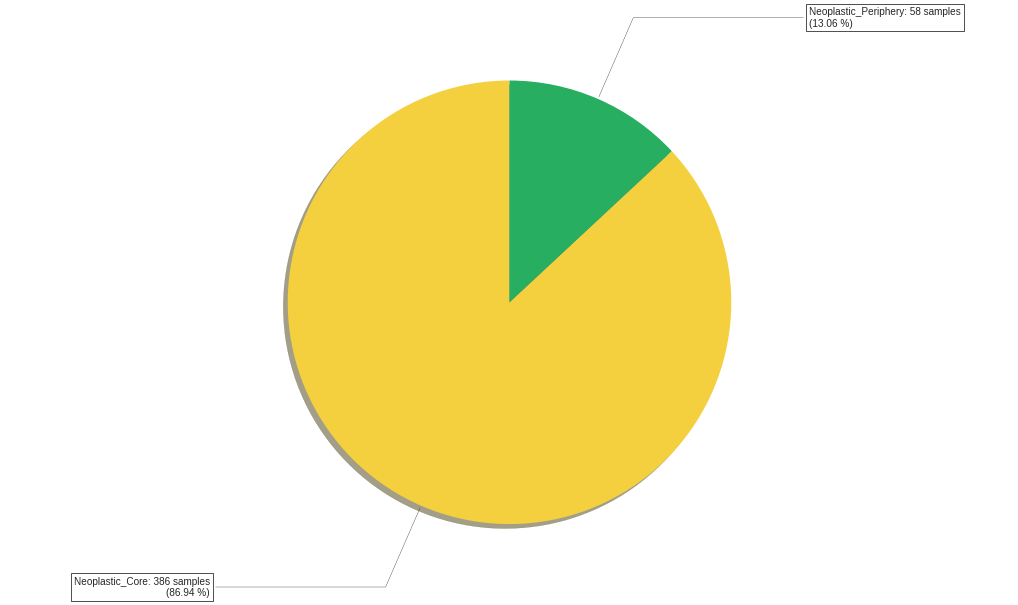

In [ ]:
print("Rows, Columns:",df.shape)
Classes = df.groupby('class').size()
labels = Classes.index.values
sizes = Classes.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

### Data Split/Transform anbd Feature Selection

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(355, 16383)
(355,)
(89, 16383)
(89,)


In [ ]:
# Feature importance 

feature_importances = np.zeros(X_train.shape[1])

model = lgb.LGBMClassifier()

In [ ]:
# Train using early stopping
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[48]	valid_0's binary_logloss: 0.112143


In [ ]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head(10)

,feature,importance
1237,ATP1A2,31.0
4040,CPE,20.0
15528,PCSK1N,11.5
1259,ATP5E,9.0
16308,PPIA,7.0
16227,POMP,5.5
8853,ITM2B,5.0
13474,MORF4L1,5.0
13753,MTRNR2L8,4.5
14092,NDUFA4,4.0


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(100)

There are 16096 features with 0.0 importance


,feature,importance
5500,ELMOD1,0.0
5501,ELMOD2,0.0
5502,ELMOD3,0.0
5503,ELN,0.0
5504,ELOF1,0.0
...,...,...
5532,EML4,0.0
5533,EML5,0.0
5534,EML6,0.0
5535,EMP1,0.0


In [ ]:
X_train = X_train.drop(columns = zero_features)
X_test = X_test.drop(columns = zero_features)

print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

Training shape:  (355, 287)
Testing shape:  (89, 287)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree Before Optimization

In [ ]:
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 23 nodes with maximum depth 8.
Model Accuracy: 1.0


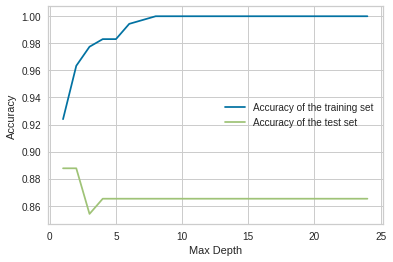

In [ ]:
neighbors_setting = range(1,25)

training_accuracy = []
test_accuracy = []

max_dep = range(1,25)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [ ]:
#Classification Report

y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

     Neoplastic_Core       0.91      0.94      0.92        77
Neoplastic_Periphery       0.50      0.42      0.45        12

            accuracy                           0.87        89
           macro avg       0.71      0.68      0.69        89
        weighted avg       0.86      0.87      0.86        89



In [ ]:
#Accuracy Score:
score_tree = accuracy_score(y_test, y_pred)*100
print("Accuracy score: %0.3f" % score_tree)

Accuracy score: 86.517


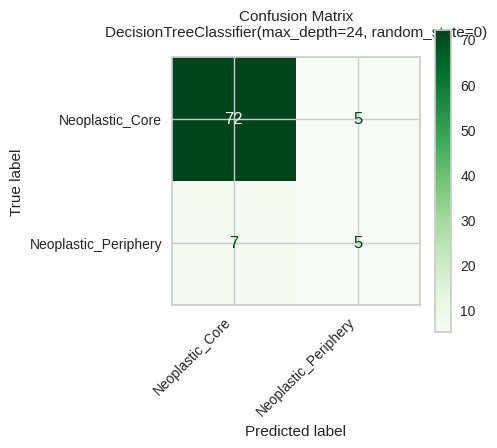

In [ ]:
#Confusion Matrix

def show_confusion_matrix(model, X_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 12})
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

show_confusion_matrix(tree, X_test, y_test)

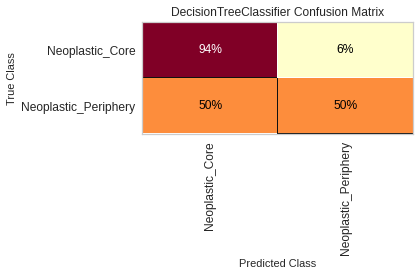

In [ ]:
classifiers=[DecisionTreeClassifier()]

classes = ["Neoplastic_Core", "Neoplastic_Periphery"]
model = tree

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

In [ ]:
# Other Metrics
model = tree

def classifier_metrics():    
    def metrics(model):
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()

In [ ]:
classifier_metrics()

DecisionTreeClassifier()
cohen_kappa_score: 0.370
log_loss: 5.433
zero_one_loss: 0.157
hemming_loss: 0.157
matthews_corrcoef: 0.372



### Decision Tree after Parameter Optimization

In [ ]:
param_grid = { 'max_depth': range(6,12), 'min_samples_leaf': range(2,10), 
               'max_leaf_nodes': range(23,30)}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=-1)

gs_dt = gs_dt.fit(X_train, y_train)

In [ ]:
gs_dt.best_params_

{'max_depth': 11, 'max_leaf_nodes': 24, 'min_samples_leaf': 2}

In [ ]:
# Using best_params_
tree2 = DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, max_leaf_nodes=24).fit(X_train,y_train)
y_pred2 = tree2.predict(X_test)

print(f'Model Accuracy: {tree2.score(X_train, y_train)}')

Model Accuracy: 0.9971830985915493


In [ ]:
#Prediction Accuracy Score:
score_tree2 = accuracy_score(y_test, y_pred2)*100
print("Accuracy score: %0.3f" % score_tree2)

Accuracy score: 84.270


In [ ]:
#Classification Report
classifiers=[DecisionTreeClassifier(max_depth=11, max_leaf_nodes=24, min_samples_leaf=2)]
model = tree2

print(classification_report(y_test,y_pred2))
classifier_metrics()

                      precision    recall  f1-score   support

     Neoplastic_Core       0.92      0.90      0.91        77
Neoplastic_Periphery       0.43      0.50      0.46        12

            accuracy                           0.84        89
           macro avg       0.67      0.70      0.68        89
        weighted avg       0.85      0.84      0.85        89

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=24, min_samples_leaf=2)
cohen_kappa_score: 0.378
log_loss: 4.665
zero_one_loss: 0.135
hemming_loss: 0.135
matthews_corrcoef: 0.380



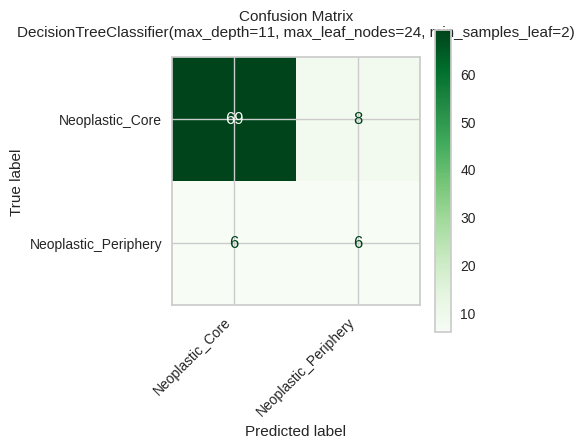

In [ ]:
show_confusion_matrix(tree2, X_test, y_test)

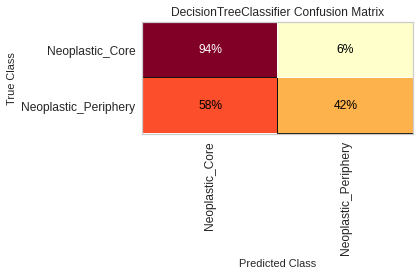

In [ ]:
classes = ["Neoplastic_Core", "Neoplastic_Periphery"]
model = tree2

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

# Summary

#### The model is begin with EDA. In the EDA phase, I discovered there are 16383 feature columns. I applied feature importance and feature selection to narrow down to 287 feature columns. For this dataset, it's possible to check for high collinearity first during the feature selection process (I didn't do this step).

#### The first desicion tree model w/o parameter optimization have Decision tree has 23 nodes with maximum depth 8 with a accuracy score of 87%. The score is good. The model is able to identified 72 true positive or at 94%, but the false positive is 7 or at 50%, which is not a low number. 

#### The Cohen Kappa Score is 0.370. The cks is metric for evaluating multi-class classifiers on imbalanced datasets. Generally closer the score is to one, better the classifier. In this case, 0.370 is on a mid-low end. MCC or Mathews Correlation Coefficient is 0.372, a coefficient of +1 represents a perfect prediction, 0 is similar to a random prediction and −1 indicates an inverse prediction. In this case, it's more of toward random prediciton.

#### After **parameter optimization**, I used {'max_depth': 11, 'max_leaf_nodes': 24, 'min_samples_leaf': 2} to the second model. The prediction accuracy score is lower at 84%. **Also,** the second model identified 69 true positive or at 94%. The false positive is 6 or at 58%, which is a higher number than the first model. Cohen kappa score is 0.378 and MCC is 380, slightly better than the first model. 

#### My final thought is that parameter optimization did not improve the model. I think a better method is to investigate features further. Feature engineering and selecting subsets of features can increase the model and prediction accuracy. 


